In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Wave Height Prediction - Exploratory Analysis

## Overview
This notebook is a continuously evolving research/exploration document for data analysis and model trials.

**Note:** Exploratory work was refactored into production scripts in `src/marine_ml` for reproducibility and deployment. View the called functions in `src/marine_ml` for details. 

The model predicts significant wave height of one buoy based on another buoy's data.

- `optuna` was used to optimise hyperparameters.
- `mlflow` was used to document model optimisation details.

In [2]:
import logging
import pickle
import warnings

import numpy as np

from marine_ml.constants import MODEL_DIR
from marine_ml.data_loading import get_marine_data
from marine_ml.plots.mapping import Location, plot_buoys_on_map
from marine_ml.plots.waves import plot_sig_wave_height, plot_wave_direction_roses
from marine_ml.train import get_preprocessed_data, split_data

warnings.filterwarnings("ignore")

logging.basicConfig(level=logging.INFO)

logger = logging.getLogger("exploration")

## Data Exploration

Load the raw data. Porthleven buoy ID is `107` and Penzance `75`. 

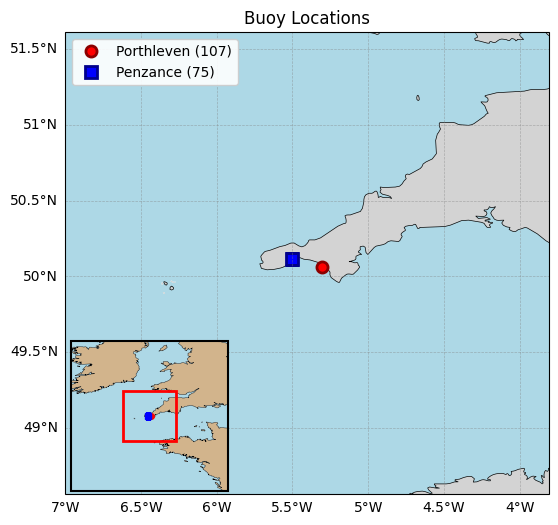

In [3]:
_ = plot_buoys_on_map(
    Location(name="Porthleven (107)", latitude=50.06258, longitude=-5.30813),
    Location(name="Penzance (75)", latitude=50.11230, longitude=-5.50121),
)

In [4]:
data = get_marine_data()
data.head(3)

,wave_height_significant_m;75,wave_height_max_m;75,sea_surface_temperature_degc;75,wave_period_peak_s;75,wave_period_mean_s;75,wave_direction_deg;75,directional_wave_spread_deg;75,wave_height_significant_m;107,wave_height_max_m;107,sea_surface_temperature_degc;107,wave_period_peak_s;107,wave_period_mean_s;107,wave_direction_deg;107,directional_wave_spread_deg;107
2025-01-06 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.73,5.34,11.55,11.11,7.018,216.6,19.1
2025-01-06 00:30:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.75,4.11,11.55,11.76,7.018,219.4,15.6
2025-01-06 01:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.35,4.66,11.55,10.53,6.780,222.2,20.5


As expected, Porthleven (`107`) measures greater significant wave height compared to Penzance (`75`); Penzance is sheltered from swell by Lands End Penninsula.

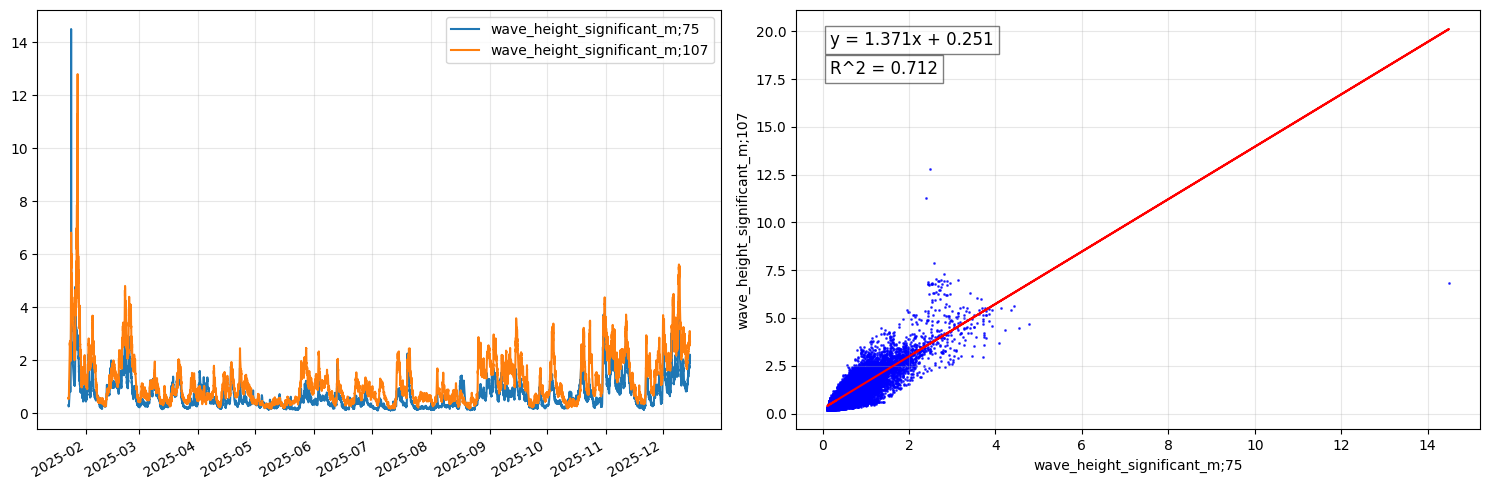

In [5]:
plot_sig_wave_height(data)

As expected, Penzance (75) has a more southerly wave direction as the waves refract around Lands End Penninsula, while Porthleven (107) contains a more westerly component.

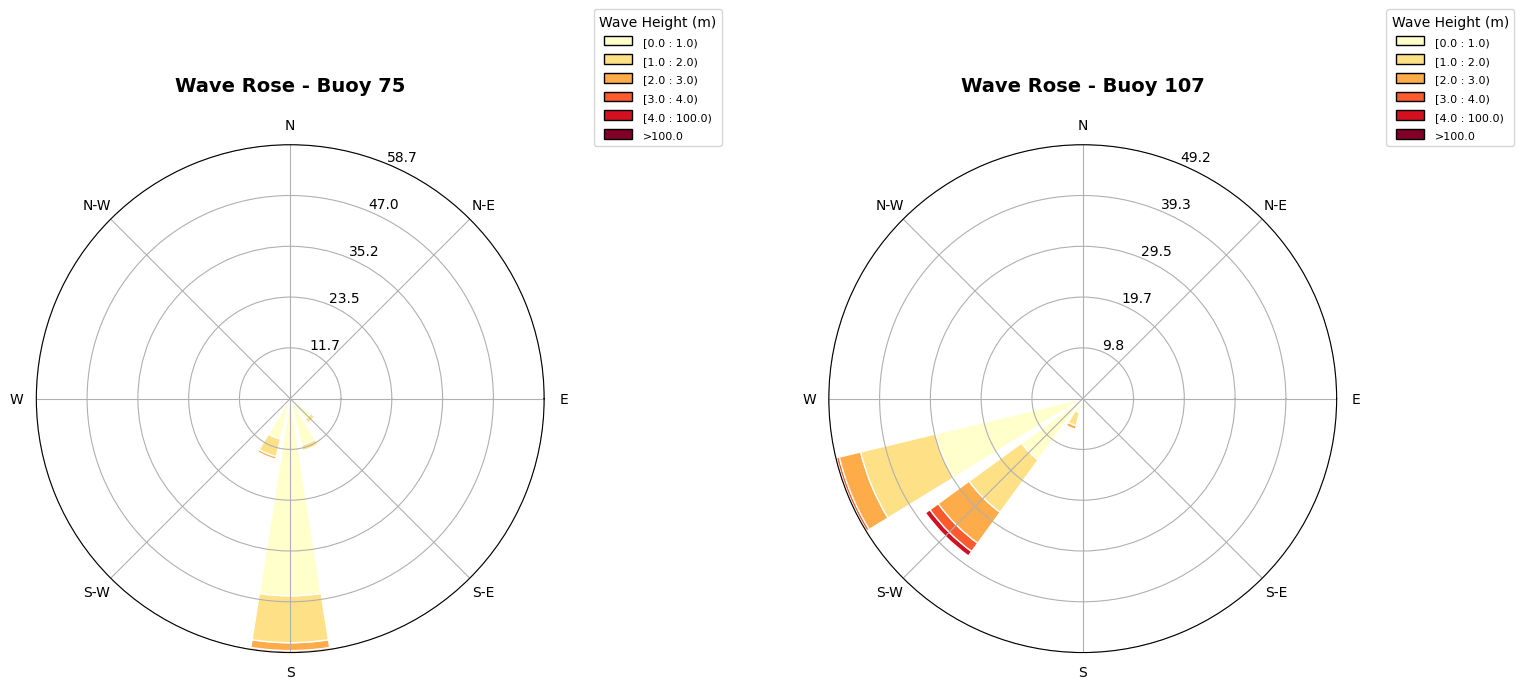

In [6]:
plot_wave_direction_roses(data)

## Load & Preprocess Data

- load the raw data
- perform some basic feature engineering
- split data for train/test

In [7]:
X, y = get_preprocessed_data()
X_train, X_test, y_train, y_test = split_data(X, y)

## Train

- train model
- optimise hyperparameters

The model with optimised hyperparameters is saved as the main model in the MLflow UI. The models trialled during the hyperparameter tuning are visible as child runs in the MLflow UI.

In [8]:
%%bash
# Start MLflow UI
poe mlflow-start

Poe => nohup uv run mlflow ui > mlflow.log 2>&1 &


INFO:marine_ml.helpers.optuna_helper:Hyperparameter optimisation with Optuna


🏃 View run pz_predict_lev_run_random_forest at: http://localhost:5000/#/experiments/1/runs/15e6e61380d44462ada85642817b5bc4
🧪 View experiment at: http://localhost:5000/#/experiments/1


  0%|          | 0/20 [00:00<?, ?it/s]

INFO:marine_ml.helpers.optuna_helper:Initial trial 0 achieved value: 0.1771976574673165


🏃 View run trial_0 at: http://localhost:5000/#/experiments/1/runs/9d2344ebeca54c21a1c0fc54498f6fa3
🧪 View experiment at: http://localhost:5000/#/experiments/1
🏃 View run trial_1 at: http://localhost:5000/#/experiments/1/runs/10d2b34a050e4345a2f54b32e6816957
🧪 View experiment at: http://localhost:5000/#/experiments/1


INFO:marine_ml.helpers.optuna_helper:Trial 2 achieved value: 0.13993943536284012 with  26.6245% improvement


🏃 View run trial_2 at: http://localhost:5000/#/experiments/1/runs/9c618fbee64f442ca5a18057d9084cda
🧪 View experiment at: http://localhost:5000/#/experiments/1


INFO:marine_ml.helpers.optuna_helper:Trial 3 achieved value: 0.10412381470420799 with  34.3971% improvement


🏃 View run trial_3 at: http://localhost:5000/#/experiments/1/runs/1bae1cc79f714a328d144eb5a7b33671
🧪 View experiment at: http://localhost:5000/#/experiments/1
🏃 View run trial_4 at: http://localhost:5000/#/experiments/1/runs/d9998fc4dda0443b90574f31ce439fb0
🧪 View experiment at: http://localhost:5000/#/experiments/1
🏃 View run trial_5 at: http://localhost:5000/#/experiments/1/runs/8a3b0f29df744eb4b7d1a7604ba22ad4
🧪 View experiment at: http://localhost:5000/#/experiments/1
🏃 View run trial_6 at: http://localhost:5000/#/experiments/1/runs/ecc587003d0f4535b91eb5b56142c229
🧪 View experiment at: http://localhost:5000/#/experiments/1
🏃 View run trial_7 at: http://localhost:5000/#/experiments/1/runs/4c8ae3efbde04b4981ba6be11d3150fd
🧪 View experiment at: http://localhost:5000/#/experiments/1
🏃 View run trial_8 at: http://localhost:5000/#/experiments/1/runs/ea26af3bd18f4e8a8a884f76682f741b
🧪 View experiment at: http://localhost:5000/#/experiments/1
🏃 View run trial_9 at: http://localhost:5000/#

INFO:marine_ml.helpers.optuna_helper:Evaluating model
2026/01/01 08:59:00 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
Registered model 'model-pz-to-lev-random_forest' already exists. Creating a new version of this model...
2026/01/01 08:59:07 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: model-pz-to-lev-random_forest, version 18
Created version '18' of model 'model-pz-to-lev-random_forest'.
INFO:marine_ml.helpers.optuna_helper:Model registered as 'model-pz-to-lev-random_forest' version 18
INFO:marine_ml.helpers.optuna_helper:Promoted to 'Production' stage.


🏃 View run pz_predict_lev_run_random_forest at: http://localhost:5000/#/experiments/1/runs/15e6e61380d44462ada85642817b5bc4
🧪 View experiment at: http://localhost:5000/#/experiments/1


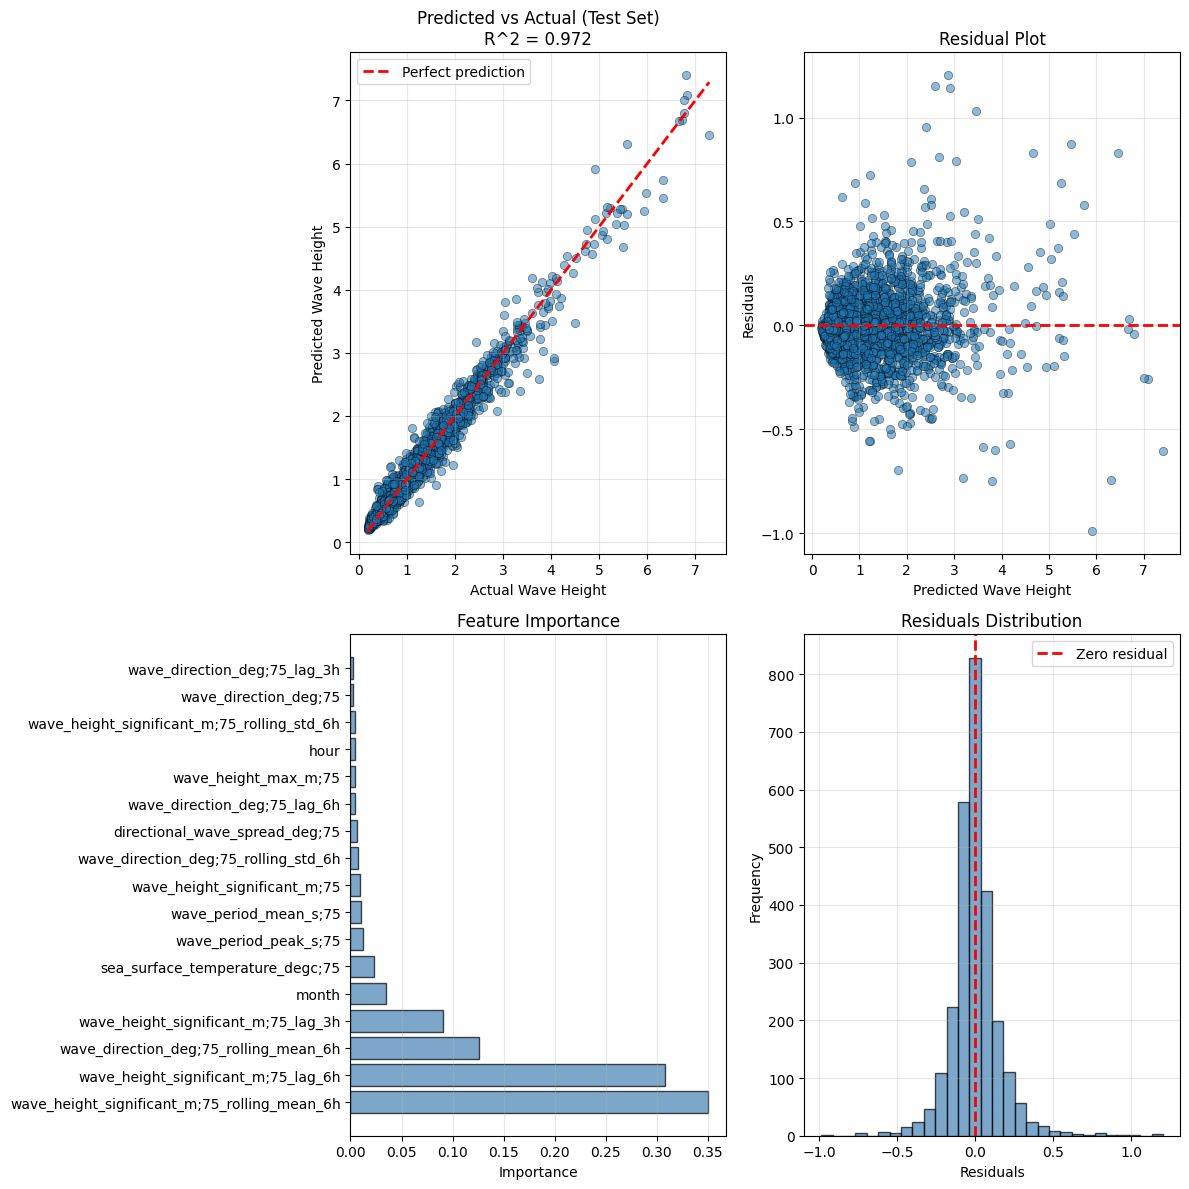

In [9]:
from marine_ml.helpers.optuna_helper import train_with_optuna

model_uri = train_with_optuna(
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
)

## Evaluate

Evaluation of the model:
- Strong predictive performance with R^2 of ~0.97. When evaluating the MLflow UI, the R^2 is comparable for the train and test datasets, suggesting the model generalises well.
- Residuals follow a normal distribution centered at zero, suggesting the model is well-calibrated.
- The rolling mean wave height features (particularly at 3-hour lag) dominate the predictions, which aligns with the physical expectation that *recent wave conditions are the strongest predictor of current conditions*. Temporal lag features (3h and 6h) are more informative than instantaneous measurements, suggesting wave propagation time between the two buoy locations is captured well. Wave direction and period contribute but are less critical than wave height itself.

## Predicting

In addition to MLflow, the model is saved to file, for convenient loading locally.

Load the model and make a prediction...

In [10]:
from marine_ml.serve import model_service

with (MODEL_DIR / "model.pkl").open("rb") as f:
    model = pickle.load(f)

features = {
    "directional_wave_spread_deg;75": 20.0,
    "hour": np.int32(7),
    "month": np.int32(12),
    "sea_surface_temperature_degc;75": 11.5,
    "wave_direction_deg;75": 180.0,
    "wave_direction_deg;75_lag_3h": 170.0,
    "wave_direction_deg;75_lag_6h": 168.0,
    "wave_direction_deg;75_rolling_mean_6h": 175.0,
    "wave_direction_deg;75_rolling_std_6h": 5.0,
    "wave_height_max_m;75": 2.4,
    "wave_height_significant_m;75": 2.0,
    "wave_height_significant_m;75_lag_3h": 1.7,
    "wave_height_significant_m;75_lag_6h": 1.6,
    "wave_height_significant_m;75_rolling_mean_6h": 1.6,
    "wave_height_significant_m;75_rolling_std_6h": 0.1,
    "wave_period_mean_s;75": 12.0,
    "wave_period_peak_s;75": 18.0,
}

wave_height_pred = model_service.predict(features)  # ty: ignore[invalid-argument-type]
print(f"Predicted wave height (m): {np.round(wave_height_pred, decimals=2)}")

INFO:marine_ml.serve:Loading model from MLflow Registry: models:/model-pz-to-lev/Production


INFO:marine_ml.serve:Loaded model version 69 from 'Production' stage


Predicted wave height (m): 3.18


The prediction of ~3m at Porthleven based on 2m at Penzance seems reasonable when compared to records of similar wave height magnitude in the raw data.

In [11]:
%%bash
# Stop MLflow UI
poe mlflow-stop

Poe => pkill -f 'mlflow'
